# RNN Classfication-MNIST using Keras

In this tutorial, we will use RNN to process No sequential data  
The original tutorial is from  https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/402_RNN_classification.py


In [1]:
import matplotlib.pyplot as plt
import os 
os.environ['KERAS_BACKEND']='tensorflow'
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, LSTM
from keras.optimizers import Adam

Using TensorFlow backend.


## Step 1: Download the data.

### Hyper Parameters
Here we set hypermeters, TIME_STEPS is image height, and INPUT_SIZE is image width  

In [2]:
BATCH_SIZE = 64    # min batch
BATCH_INDEX = 0    # to locate patch postion
TIME_STEPS = 28    # RNN time step / image height
INPUT_SIZE = 28   # RNN input step / image width
LR = 0.01         # Learning rate


OUTPUT_SIZE = 10 # number of class
CELL_SIZE = 64  #hidden units per RNN cell 


## Input data  and pre-processing
Normalize data can help optimize faster


In [3]:
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, TIME_STEPS, INPUT_SIZE) / 255.      # normalize
X_test = X_test.reshape(-1, TIME_STEPS, INPUT_SIZE) / 255.        # normalize
y_train = np_utils.to_categorical(y_train, num_classes=OUTPUT_SIZE)
y_test = np_utils.to_categorical(y_test, num_classes=OUTPUT_SIZE)

### Plot one example

(60000, 28, 28)
(60000, 10)


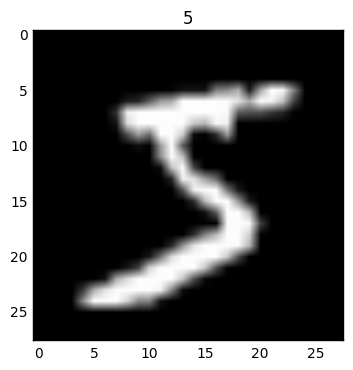

In [4]:
print X_train.shape
print y_train.shape
plt.imshow(X_train[0],cmap='gray')
plt.title('%i' % np.argmax(y_train[0]))
plt.show()

## Step 2: Build model

In [5]:
# build RNN model
model = Sequential()
# RNN cell
model.add(LSTM(
    batch_input_shape=(None, TIME_STEPS, 
                       INPUT_SIZE),
    output_dim=CELL_SIZE,
    unroll=True,))
# output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))
# optimizer
model.compile(optimizer=Adam(LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=64, unroll=True, batch_input_shape=(None, 28,...)`
  


('test cost: ', 2.2902121543884277, 'test accuracy: ', 0.16819998621940613)
('test cost: ', 1.0910806655883789, 'test accuracy: ', 0.61729991436004639)
('test cost: ', 0.80249136686325073, 'test accuracy: ', 0.72879999876022339)
('test cost: ', 0.46321737766265869, 'test accuracy: ', 0.84940004348754883)
('test cost: ', 0.41770178079605103, 'test accuracy: ', 0.87370008230209351)
('test cost: ', 0.31349825859069824, 'test accuracy: ', 0.9053000807762146)
('test cost: ', 0.27269324660301208, 'test accuracy: ', 0.92110008001327515)
('test cost: ', 0.26445883512496948, 'test accuracy: ', 0.92350012063980103)
('test cost: ', 0.2303420752286911, 'test accuracy: ', 0.93270015716552734)
('test cost: ', 0.17883521318435669, 'test accuracy: ', 0.94820010662078857)
('test cost: ', 0.19926182925701141, 'test accuracy: ', 0.94390010833740234)
('test cost: ', 0.17232902348041534, 'test accuracy: ', 0.94990009069442749)
('test cost: ', 0.17863982915878296, 'test accuracy: ', 0.94820010662078857)
('t

## Step 3: Train the model

In [ ]:
# training
for step in range(1000):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX
    if step % 50 == 0:
        cost, accuracy = model.evaluate(
            X_test, y_test, 
            batch_size=y_test.shape[0], verbose=False)
        print('test cost: ', cost, 'test accuracy: ', accuracy)

## Step 4: Evaluating Model

In [6]:
# print 10 predictions from test data
test_output = model.predict(X_test)
pred_y = np.argmax(test_output, 1)
print(pred_y[:10], 'prediction number')
print(np.argmax(y_test[:10], 1), 'real number')

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'prediction number')
(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), 'real number')
